In [1]:
import nltk
import os
import chardet
import re

---
TextTiling

Similarity determination:


* Vocabulary Introduction: Similarity is measured as the negative of the number of new terms introduced on either side of the gap

* Block Comparison: compute correlation coefficients between left and right blocks based on within-block term frequency (without inverse document frequency) (We will use this method) Normalized inner product of two word vectors

---
## Cornell dataset

### sort lines by IDs and save to .txt files

In [136]:
from smart_open import smart_open
import os
import chardet
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
import pandas as pd

In [227]:
# stop = set(stopwords.words('english'))

def read_lines(dirname):
    line_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        tokenizer = RegexpTokenizer(r'\w+')
        for line in f:
            line = line.replace('[','').replace(']','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            line_ = nltk.word_tokenize(tmp[-1])
#             line_ = tokenizer.tokenize(tmp[-1].lower())
#             line_ = [x for x in line_ if x not in stop]
            line_dict[tmp[0]] = {'ID1':tmp[1],'MovieID':tmp[2],'Name':tmp[3],'Line':line_}
        return line_dict
    
def read_conversations(dirname):
    conva_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        for line in f:
            line = line.replace('[','').replace(']','').replace('\'','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            yield tmp

In [138]:
movie_lines = read_lines('../datasets/cornell-corpus/movie_lines.txt')

In [228]:
conversations = read_conversations('../datasets/cornell-corpus/movie_conversations.txt')
conversations = [x for x in conversations]

In [230]:
conversations = pd.DataFrame(conversations)
conversations.columns = ['SpeakerID1','SpeakerID2','MovieID','LineIDs']
conversations.head(5)

,SpeakerID1,SpeakerID2,MovieID,LineIDs
0,u0,u2,m0,"L194, L195, L196, L197"
1,u0,u2,m0,"L198, L199"
2,u0,u2,m0,"L200, L201, L202, L203"
3,u0,u2,m0,"L204, L205, L206"
4,u0,u2,m0,"L207, L208"


In [231]:
conversations

,SpeakerID1,SpeakerID2,MovieID,LineIDs
0,u0,u2,m0,"L194, L195, L196, L197"
1,u0,u2,m0,"L198, L199"
2,u0,u2,m0,"L200, L201, L202, L203"
3,u0,u2,m0,"L204, L205, L206"
4,u0,u2,m0,"L207, L208"
5,u0,u2,m0,"L271, L272, L273, L274, L275"
6,u0,u2,m0,"L276, L277"
7,u0,u2,m0,"L280, L281"
8,u0,u2,m0,"L363, L364"
9,u0,u2,m0,"L365, L366"


In [8]:
for ids in conversations.LineIDs[0].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L194 Can we make this quick ? Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad . Again .
L195 Well , I thought we 'd start with pronunciation , if that 's okay with you .
L196 Not the hacking and gagging and spitting part . Please .
L197 Okay ... then how 'bout we try out some French cuisine . Saturday ? Night ?


In [9]:
for ids in conversations.LineIDs[1].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L198 You 're asking me out . That 's so cute . What 's your name again ?
L199 Forget it .


In [10]:
for ids in conversations.LineIDs[2].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L200 No , no , it 's my fault -- we did n't have a proper introduction -- -
L201 Cameron .
L202 The thing is , Cameron -- I 'm at the mercy of a particularly hideous breed of loser . My sister . I ca n't date until she does .
L203 Seems like she could get a date easy enough ...


In [11]:
for ids in conversations.LineIDs[3].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L204 Why ?
L205 Unsolved mystery . She used to be really popular when she started high school , then it was just like she got sick of it or something .
L206 That 's a shame .


In [12]:
for ids in conversations.LineIDs[4].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L207 Gosh , if only we could find Kat a boyfriend ...
L208 Let me see what I can do .


In [233]:
def split_func(string):
    return int(string.split(', ')[0][1:])
def split_func2(string):
    return int(string.split(', ')[-1][1:])

conversations['startID'] = conversations.LineIDs.apply(split_func)
conversations['endID'] = conversations.LineIDs.apply(split_func2)
conversations = conversations.sort_values(by='startID').reset_index(drop=True)
conversations.head(5)

,SpeakerID1,SpeakerID2,MovieID,LineIDs,startID,endID
0,u0,u3,m0,"L49, L50, L51",49,51
1,u8,u9,m0,"L59, L60, L61, L62",59,62
2,u2,u7,m0,"L63, L64, L65",63,65
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,74
4,u2,u7,m0,"L77, L78",77,78


In [235]:
test = (conversations[['SpeakerID1','SpeakerID2']] == conversations[['SpeakerID1','SpeakerID2']].shift())
test = test['SpeakerID1'] & test['SpeakerID2']
test2 = (conversations['startID'] == conversations['endID'].shift()+1)
conversations['label'] = 1-(test & test2)*1
conversations.head(5)

,SpeakerID1,SpeakerID2,MovieID,LineIDs,startID,endID,label
0,u0,u3,m0,"L49, L50, L51",49,51,1
1,u8,u9,m0,"L59, L60, L61, L62",59,62,1
2,u2,u7,m0,"L63, L64, L65",63,65,1
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,74,0
4,u2,u7,m0,"L77, L78",77,78,1


In [49]:
len_ = np.where(conversations.label==1)[0][1:] - np.where(conversations.label==1)[0][:-1]
len_ = np.append(len_,conversations.label.tail(1))

In [50]:
dialogue_no = [[x]*y for x,y in zip(np.arange(sum(conversations.label)),len_)]
dialogue_no = [item for sublist in dialogue_no for item in sublist]

In [51]:
conversations['dialogue_no'] = dialogue_no

In [52]:
conversations.head()

,ID1,ID2,MovieID,LineIDs,startID,endID,label,dialogue_no
0,u0,u3,m0,"L49, L50, L51",49,51,1,0
1,u8,u9,m0,"L59, L60, L61, L62",59,62,1,1
2,u2,u7,m0,"L63, L64, L65",63,65,1,2
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,74,0,2
4,u2,u7,m0,"L77, L78",77,78,1,3


In [24]:
for ids in conversations.LineIDs[2].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L63 You the new guy ?
L64 So they tell me ...
L65 C'mon . I 'm supposed to give you the tour .


In [25]:
for ids in conversations.LineIDs[3].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L66 So -- which Dakota you from ?
L67 North , actually . How 'd you ?
L68 I was kidding . People actually live there ?
L69 Yeah . A couple . We 're outnumbered by the cows , though .
L70 How many people were in your old school ?
L71 Thirty-two .
L72 Get out !
L73 How many people go here ?
L74 Couple thousand . Most of them evil


In [26]:
for ids in conversations.LineIDs[4].split(', '):
    print(ids,' '.join(movie_lines[ids]['Line']))

L77 That I 'm used to .
L78 Yeah , but these guys have never seen a horse . They just jack off to Clint Eastwood .


In [53]:
foo = lambda a: ', '.join(a) 
conv_new = conversations.groupby(['ID1','ID2','dialogue_no']).agg({'LineIDs':foo}).reset_index()
conv_new = conv_new.sort_values(by='dialogue_no').reset_index(drop=True)

In [54]:
conv_new['Turn'] = conv_new.LineIDs.str.split(',').apply(len)

In [55]:
def avg_wlen(IDs):
    """
    Return average word counts of each sentence in one dialogue.
    """
    l = 0
    tokenizer = RegexpTokenizer(r'\w+')
    for ID in IDs:
        l += len(tokenizer.tokenize(' '.join(movie_lines[ID]['Line'])))
    return l/len(IDs)

conv_new['Word_cnt'] = conv_new.LineIDs.str.split(', ').apply(avg_wlen)

In [56]:
conv_new.head(10)

,ID1,ID2,dialogue_no,LineIDs,Turn,Word_cnt
0,u0,u3,0,"L49, L50, L51",3,4.333333
1,u8,u9,1,"L59, L60, L61, L62",4,7.250000
2,u2,u7,2,"L63, L64, L65, L66, L67, L68, L69, L70, L71, L...",12,5.666667
3,u2,u7,3,"L77, L78",2,10.500000
4,u2,u7,4,"L87, L88, L89, L90, L91, L92",6,8.666667
5,u5,u8,5,"L103, L104, L105, L106, L107, L108, L109",7,12.714286
6,u5,u6,6,"L123, L124, L125, L126, L127, L128, L129, L130...",12,10.250000
7,u2,u7,7,"L139, L140, L141, L142, L143, L144, L145, L146...",9,12.888889
8,u4,u5,8,"L148, L149, L150",3,14.333333
9,u5,u6,9,"L151, L152",2,11.000000


In [57]:
conv_new.describe()

,dialogue_no,Turn,Word_cnt
count,60699.000000,60699.000000,60699.000000
mean,30349.000000,5.020066,11.023440
std,17522.436332,5.312256,7.323081
min,0.000000,2.000000,0.000000
25%,15174.500000,2.000000,6.281746
50%,30349.000000,3.000000,9.500000
75%,45523.500000,6.000000,13.857143
max,60698.000000,161.000000,196.000000


In [58]:
# conv_new.to_csv('../datasets/cornell-corpus/cleaned.csv',index=False)

In [238]:
# save cornell corpus line by line in .txt
# for movie in conversations.MovieID.unique():
#     tmp_df = conversations.loc[conversations.MovieID==movie].copy()
#     tmp_df = pd.DataFrame(tmp_df.LineIDs.str.split(', ').tolist(),index=tmp_df.MovieID).stack()
#     tmp_df = tmp_df.reset_index()
#     tmp_df.columns = ['MovieID','label','LineIDs']
#     for i in range(len(tmp_df)):
#         s = movie_lines[tmp_df.LineIDs.loc[i]]['Line']
#         with open('./data/cornell/%s.txt'%movie, 'a') as f:
#             f.write(' '.join(s)+'\n')

### Train word2vec model with virtual sentences

improve our own model using google-news

https://stackoverflow.com/questions/35117491/is-it-possible-to-re-train-a-word2vec-model-e-g-googlenews-vectors-negative300

In [1]:
import os
import pandas as pd
import gensim
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from prettytable import PrettyTable
from nltk.stem import PorterStemmer,WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer() 
ps = PorterStemmer() 
tokenizer = RegexpTokenizer(r'\w+')

In [2]:
# 获取单词的词性
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
def lemma_sentence(s):
    sentence = s
    tokens = tokenizer.tokenize(sentence)  # 分词
    tagged_sent = pos_tag(tokens)     # 获取单词词性

    lemmas_sent = []
    for tag in tagged_sent:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmas_sent.append(lemmatizer.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
    return lemmas_sent

First train word embedding model without virtual sentence.

Model 2: not lower case, not virtual sentence

Model 3: not lower case, virtual sentence

Model 4: not lower, virtual sentence, token

Model 5: lower case, not virtual sentence

Model 6: lower case, virtual sentence

Model 7: lower, virtual sentence, token

In [3]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split() # not using virtual sentences
#                 tmp = line.split()

In [4]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model2 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model2.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model2.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model2.train(sentences,total_examples=model2.corpus_count,epochs=model2.epochs)

(2745632, 4180181)

In [5]:
model2.save('./word2vec/model2')

In [6]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                yield tmp+line.split() # virtual sentences
                tmp = line.split()

In [7]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model3 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model3.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model3.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model3.train(sentences,total_examples=model3.corpus_count,epochs=model3.epochs)

(5553679, 8351942)

In [8]:
model3.save('./word2vec/model3')

In [9]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        tokenizer = RegexpTokenizer(r'\w+')
#         stop = set(stopwords.words('english'))
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                tmp2 = tokenizer.tokenize(line)
                yield tmp+tmp2 # virtual sentences
                tmp = tmp2

In [10]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model4 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model4.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model4.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model4.train(sentences,total_examples=model4.corpus_count,epochs=model4.epochs)

(5067186, 6942548)

In [11]:
model4.save('./word2vec/model4')

In [30]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.lower().split() # not using virtual sentences
#                 tmp = line.split()

In [31]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model5 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model5.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model5.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model5.train(sentences,total_examples=model5.corpus_count,epochs=model5.epochs)

(2619559, 4180181)

In [32]:
model5.save('./word2vec/model5')

In [33]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                yield tmp+line.lower().split() # virtual sentences
                tmp = line.lower().split()

In [34]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model6 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model6.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model6.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model6.train(sentences,total_examples=model6.corpus_count,epochs=model6.epochs)

(5290330, 8351942)

In [39]:
model6.save('./word2vec/model6')

In [36]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        tokenizer = RegexpTokenizer(r'\w+')
#         stop = set(stopwords.words('english'))
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                tmp2 = tokenizer.tokenize(line.lower())
                yield tmp+tmp2 # virtual sentences
                tmp = tmp2

In [37]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model7 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model7.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model7.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model7.train(sentences,total_examples=model7.corpus_count,epochs=model7.epochs)

(4786896, 6942548)

In [38]:
model7.save('./word2vec/model7')

In [494]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        tokenizer = RegexpTokenizer(r'\w+')
#         stop = set(stopwords.words('english'))
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                tmp2 = tokenizer.tokenize(line.lower())
                yield tmp2 # virtual sentences

In [495]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model8 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model8.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model8.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model8.train(sentences,total_examples=model8.corpus_count,epochs=model8.epochs)

(2371245, 3474699)

In [496]:
model8.save('./word2vec/model8')

In [256]:
model2.wv.similarity('Thank','welcome') #not lower, not virtual, not token

0.38515984360096356

In [257]:
model3.wv.similarity('Thank','welcome') #not lower, virtual, not token

0.3362176925914835

In [258]:
model4.wv.similarity('Thank','welcome') #not lower, virtual, token

0.3993099605938164

In [79]:
model5.wv.similarity('thank','welcome') # lower, not virtual, not token

0.42422152702440713

In [124]:
model6.wv.similarity('thank','welcome') # lower, virtual, not token

0.4431465429842917

In [125]:
model7.wv.similarity('thank','welcome') # lower, virtual, token

0.42022125910372576

Test the performance of virtual sentence training.

In [261]:
import numpy as np
def cos_sim(v1,v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

def heuristic_max(s1,s2,model):
    if len(s1)*len(s2) == 0:
        return np.nan

    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        if s1[i] in model.vocab.keys():
            s1_vec = model[s1[i]]
        else:
            continue # if the source target word is not in vocabulary list then corresponding similiarity row = 0
        for j in range(len(s2)):            
            if s2[j] in model.vocab.keys():
                s2_vec = model[s2[j]]
                matrix[i][j] = cos_sim(s1_vec,s2_vec)
            else:
                continue # for not-found words the similarity is 0
    s1_sim =  np.sum(np.max(matrix,1))/len(s1)
    s2_sim = np.sum(np.max(matrix,0))/len(s2)
    return np.round(s1_sim,5),np.round(s2_sim,5),1/2*(np.round(s1_sim,5)+np.round(s2_sim,5))

In [269]:
s1 = 'Thank you so much for your help '
s2 = 'You are welcome '

In [270]:
heuristic_max(s1.split(),s2.split(),model=model2.wv)  #not lower, not virtual, not token

(0.38272, 0.45723, 0.419975)

In [271]:
heuristic_max(s1.split(),s2.split(),model=model3.wv) #not lower, virtual, not token

(0.30699, 0.4064, 0.356695)

In [272]:
s1_ = tokenizer.tokenize(s1)
s2_ = tokenizer.tokenize(s2)
heuristic_max(s1_,s2_,model=model4.wv) #not lower, virtual, token

(0.34948, 0.43785, 0.39366500000000004)

In [273]:
heuristic_max(s1.lower().split(),s2.lower().split(),model=model5.wv) # lower, not virtual, not token

(0.46657, 0.5652, 0.515885)

In [274]:
heuristic_max(s1.lower().split(),s2.lower().split(),model=model6.wv) # lower, virtual, not token

(0.43626, 0.58689, 0.511575)

In [275]:
s1_ = tokenizer.tokenize(s1.lower())
s2_ = tokenizer.tokenize(s2.lower())
heuristic_max(s1_,s2_,model=model7.wv) # lower, virtual, token

(0.44656, 0.57403, 0.510295)

### session segmentation

In [2]:
import gensim
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from prettytable import PrettyTable
# Load Google's pre-trained Word2Vec model.
# model1 = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [64]:
model4 = gensim.models.Word2Vec.load('./word2vec/model4')
model5 = gensim.models.Word2Vec.load('./word2vec/model5')

In [139]:
def cos_sim(v1,v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [499]:
def heuristic_max(s1_ID,s2_ID,line_dict,lower_,token_,model):
#     s1 = list(set(s1))
#     s2 = list(set(s2))
    s1 = ' '.join(movie_lines[s1_ID]['Line'])
    s2 = ' '.join(movie_lines[s2_ID]['Line'])
    if lower_:
        s1 = s1.lower()
        s2 = s2.lower()
    if token_:
        tokenizer = RegexpTokenizer(r'\w+')
        s1 = ' '.join(tokenizer.tokenize(s1))
        s2 = ' '.join(tokenizer.tokenize(s2))
    
    s1 = s1.split(' ')
    s2 = s2.split(' ')
    
    if len(s1)*len(s2) == 0:
        return 0
    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        if s1[i] in model.vocab.keys():
            s1_vec = model[s1[i]]
        else:
            continue # if the source target word is not in vocabulary list then corresponding similiarity row = 0
        for j in range(len(s2)):            
            if s2[j] in model.vocab.keys():
                s2_vec = model[s2[j]]
                matrix[i][j] = cos_sim(s1_vec,s2_vec)
            else:
                continue # for not-found words the similarity is 0
    s1_sim =  np.sum(np.max(matrix,1))/len(s1)
    s2_sim = np.sum(np.max(matrix,0))/len(s2)
    return np.round(s1_sim,5),np.round(s2_sim,5),1/2*(np.round(s1_sim,5)+np.round(s2_sim,5))

In [189]:
# copy from https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
import numpy

def smooth(x,window_len=7,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise(ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y[window_len//2:-window_len//2+1]

In [142]:
conv_new = pd.read_csv('../datasets/cornell-corpus/cleaned.csv')
conv_new.describe()

,dialogue_no,Turn,Word_cnt
count,60699.000000,60699.000000,60699.000000
mean,30349.000000,5.020066,11.023440
std,17522.436332,5.312256,7.323081
min,0.000000,2.000000,0.000000
25%,15174.500000,2.000000,6.281746
50%,30349.000000,3.000000,9.500000
75%,45523.500000,6.000000,13.857143
max,60698.000000,161.000000,196.000000


In [147]:
conv_new

,ID1,ID2,dialogue_no,LineIDs,Turn,Word_cnt
0,u0,u3,0,"L49, L50, L51",3,4.333333
1,u8,u9,1,"L59, L60, L61, L62",4,7.250000
2,u2,u7,2,"L63, L64, L65, L66, L67, L68, L69, L70, L71, L...",12,5.666667
3,u2,u7,3,"L77, L78",2,10.500000
4,u2,u7,4,"L87, L88, L89, L90, L91, L92",6,8.666667
5,u5,u8,5,"L103, L104, L105, L106, L107, L108, L109",7,12.714286
6,u5,u6,6,"L123, L124, L125, L126, L127, L128, L129, L130...",12,10.250000
7,u2,u7,7,"L139, L140, L141, L142, L143, L144, L145, L146...",9,12.888889
8,u4,u5,8,"L148, L149, L150",3,14.333333
9,u5,u6,9,"L151, L152",2,11.000000


In [144]:
conv_filter = conv_new.loc[(conv_new.Turn>=2) & (conv_new.Turn<=10) &
                           (conv_new.Word_cnt>=6) & (conv_new.Word_cnt<=14)].copy()

In [145]:
len(conv_new)

60699

In [146]:
len(conv_filter)

29244

In [148]:
new_df = pd.DataFrame(conv_filter.LineIDs.str.split(', ').tolist(),index=conv_filter.dialogue_no).stack()
new_df = new_df.reset_index()
new_df.columns = ['MovieID','label','LineIDs']
new_df.label = 1 - new_df.label.clip(upper=1)
new_df.head(10)

,MovieID,label,LineIDs
0,1,1,L59
1,1,0,L60
2,1,0,L61
3,1,0,L62
4,3,1,L77
5,3,0,L78
6,4,1,L87
7,4,0,L88
8,4,0,L89
9,4,0,L90


In [155]:
sim =  [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                    model=model2.wv,lower_=False,token_=False) for i in range(10)]

In [158]:
# model 2: not lower, not virtual, not token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                    model=model2.wv,lower_=False,token_=False) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]
new_df['model2_sim1'] = [1] + sim1
new_df['model2_sim2'] = [1] + sim2
new_df['model2_simavg'] = [1] + simavg

In [159]:
# model 3: not lower, virtual, not token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model3.wv,
                     lower_=False,
                     token_=False) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model3_sim1'] = [1] + sim1
new_df['model3_sim2'] = [1] + sim2
new_df['model3_simavg'] = [1] + simavg

In [206]:
# model4: not lower, virtual, token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model4.wv,
                     lower_=False,
                     token_=True) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model4_sim1'] = [1] + sim1
new_df['model4_sim2'] = [1] + sim2
new_df['model4_simavg'] = [1] + simavg

In [207]:
# model 5: lower, not virtual, not token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model5.wv,
                     lower_=True,
                     token_=False) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model5_sim1'] = [1] + sim1
new_df['model5_sim2'] = [1] + sim2
new_df['model5_simavg'] = [1] + simavg

In [208]:
# model 6: lower, virtual, not token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model6.wv,
                     lower_=True,
                     token_=False) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model6_sim1'] = [1] + sim1
new_df['model6_sim2'] = [1] + sim2
new_df['model6_simavg'] = [1] + simavg

In [209]:
# model 7: lower, virtual, token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model7.wv,
                     lower_=True,
                     token_=True) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model7_sim1'] = [1] + sim1
new_df['model7_sim2'] = [1] + sim2
new_df['model7_simavg'] = [1] + simavg

In [500]:
# model 8: lower, not virtual, token
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                     model=model8.wv,
                     lower_=True,
                     token_=True) for i in range(len(new_df)-1)]
sim1 = [x[0] for x in sim]
sim2 = [x[1] for x in sim]
simavg = [x[2] for x in sim]

new_df['model8_sim1'] = [1] + sim1
new_df['model8_sim2'] = [1] + sim2
new_df['model8_simavg'] = [1] + simavg

In [524]:
new_df.to_csv('TextSimilarity.csv',index=False)

In [8]:
new_df = pd.read_csv('TextSimilarity.csv')

In [210]:
new_df.describe()

,MovieID,label,model2_sim1,model2_sim2,model2_simavg,model3_sim1,model3_sim2,model3_simavg,model4_sim1,model4_sim2,model4_simavg,model5_sim1,model5_sim2,model5_simavg,model6_sim1,model6_sim2,model6_simavg,model7_sim1,model7_sim2,model7_simavg
count,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000
mean,30241.910266,0.258948,0.489173,0.489499,0.489336,0.455521,0.455877,0.455699,0.367625,0.368238,0.367931,0.510997,0.511581,0.511289,0.472858,0.473556,0.473207,0.389916,0.391240,0.390578
std,17513.272867,0.438059,0.132533,0.132979,0.108391,0.134610,0.135085,0.107585,0.165727,0.165830,0.145023,0.131772,0.133234,0.106857,0.137125,0.138584,0.110441,0.164293,0.166606,0.140670
min,1.000000,0.000000,-0.058190,-0.075800,-0.037415,-0.056780,-0.041250,-0.005710,-0.225060,-0.225060,-0.225060,-0.100010,-0.096010,-0.077365,-0.065490,-0.059140,-0.025970,-0.145090,-0.184300,-0.130730
25%,15124.250000,0.000000,0.400020,0.400340,0.419485,0.362640,0.362510,0.383170,0.267860,0.267990,0.279186,0.421563,0.421650,0.441802,0.376940,0.377500,0.399367,0.287120,0.286910,0.298611
50%,30440.500000,0.000000,0.480600,0.481110,0.489415,0.442590,0.442970,0.451547,0.361110,0.361940,0.368402,0.501110,0.502085,0.511350,0.459725,0.459870,0.471070,0.376555,0.378140,0.386350
75%,45289.000000,1.000000,0.569590,0.570000,0.556934,0.534447,0.534567,0.520814,0.459800,0.461097,0.457985,0.590037,0.590880,0.577615,0.553625,0.554608,0.540645,0.478330,0.480167,0.476315
max,60698.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
new_df.describe()

,MovieID,label,model2_sim1,model2_sim2,model2_simavg,model3_sim1,model3_sim2,model3_simavg,model4_sim1,model4_sim2,model4_simavg,model5_sim1,model5_sim2,model5_simavg,model6_sim1,model6_sim2,model6_simavg,model7_sim1,model7_sim2,model7_simavg
count,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000
mean,30241.910266,0.258948,0.489173,0.489499,0.489336,0.455521,0.455877,0.455699,0.367625,0.368238,0.367931,0.510997,0.511581,0.511289,0.472858,0.473556,0.473207,0.389916,0.391240,0.390578
std,17513.272867,0.438059,0.132533,0.132979,0.108391,0.134610,0.135085,0.107585,0.165727,0.165830,0.145023,0.131772,0.133234,0.106857,0.137125,0.138584,0.110441,0.164293,0.166606,0.140670
min,1.000000,0.000000,-0.058190,-0.075800,-0.037415,-0.056780,-0.041250,-0.005710,-0.225060,-0.225060,-0.225060,-0.100010,-0.096010,-0.077365,-0.065490,-0.059140,-0.025970,-0.145090,-0.184300,-0.130730
25%,15124.250000,0.000000,0.400020,0.400340,0.419485,0.362640,0.362510,0.383170,0.267860,0.267990,0.279186,0.421563,0.421650,0.441802,0.376940,0.377500,0.399367,0.287120,0.286910,0.298611
50%,30440.500000,0.000000,0.480600,0.481110,0.489415,0.442590,0.442970,0.451547,0.361110,0.361940,0.368402,0.501110,0.502085,0.511350,0.459725,0.459870,0.471070,0.376555,0.378140,0.386350
75%,45289.000000,1.000000,0.569590,0.570000,0.556934,0.534447,0.534567,0.520814,0.459800,0.461097,0.457985,0.590037,0.590880,0.577615,0.553625,0.554608,0.540645,0.478330,0.480167,0.476315
max,60698.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [212]:
new_df.loc[new_df.label==1].describe()

,MovieID,label,model2_sim1,model2_sim2,model2_simavg,model3_sim1,model3_sim2,model3_simavg,model4_sim1,model4_sim2,model4_simavg,model5_sim1,model5_sim2,model5_simavg,model6_sim1,model6_sim2,model6_simavg,model7_sim1,model7_sim2,model7_simavg
count,29244.000000,29244.0,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000,29244.000000
mean,30312.297018,1.0,0.474380,0.477701,0.476040,0.438987,0.442324,0.440656,0.344694,0.350557,0.347626,0.495458,0.498239,0.496848,0.455622,0.458753,0.457187,0.364157,0.370604,0.367381
std,17575.726429,0.0,0.120847,0.118997,0.099764,0.120723,0.119133,0.097516,0.145876,0.149421,0.132387,0.119081,0.116761,0.096830,0.122583,0.120493,0.099009,0.141587,0.146100,0.125951
min,1.000000,1.0,-0.058190,0.000000,-0.016670,-0.043660,0.000000,0.000000,-0.225060,-0.225060,-0.225060,-0.032520,-0.003900,0.000000,-0.065490,0.000000,-0.016280,-0.136980,-0.151980,-0.122200
25%,15165.750000,1.0,0.394380,0.399498,0.413136,0.356168,0.360930,0.375478,0.260687,0.262428,0.269959,0.415430,0.420690,0.434954,0.369977,0.376548,0.391376,0.279517,0.279830,0.288303
50%,30426.500000,1.0,0.469960,0.472920,0.478897,0.430925,0.433450,0.439585,0.345205,0.351070,0.354258,0.491325,0.492120,0.499135,0.448740,0.449830,0.457445,0.359530,0.365270,0.368600
75%,45622.250000,1.0,0.551083,0.551475,0.540448,0.512583,0.513830,0.503080,0.432825,0.440292,0.433307,0.570290,0.569723,0.559225,0.531432,0.531223,0.520750,0.447115,0.456325,0.448140
max,60698.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
new_df.loc[new_df.label==0].describe()

,MovieID,label,model2_sim1,model2_sim2,model2_simavg,model3_sim1,model3_sim2,model3_simavg,model4_sim1,model4_sim2,model4_simavg,model5_sim1,model5_sim2,model5_simavg,model6_sim1,model6_sim2,model6_simavg,model7_sim1,model7_sim2,model7_simavg
count,83690.000000,83690.0,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000,83690.000000
mean,30217.314852,0.0,0.494342,0.493622,0.493982,0.461299,0.460613,0.460956,0.375637,0.374416,0.375027,0.516427,0.516243,0.516335,0.478880,0.478728,0.478804,0.398917,0.398451,0.398684
std,17491.435463,0.0,0.136002,0.137292,0.110873,0.138673,0.139923,0.110406,0.171404,0.170763,0.148534,0.135509,0.138226,0.109699,0.141361,0.144015,0.113635,0.170607,0.172620,0.144589
min,1.000000,0.0,-0.055290,-0.075800,-0.037415,-0.056780,-0.041250,-0.005710,-0.168250,-0.168450,-0.168250,-0.100010,-0.096010,-0.077365,-0.047080,-0.059140,-0.025970,-0.145090,-0.184300,-0.130730
25%,15110.250000,0.0,0.402090,0.400770,0.421950,0.364903,0.363015,0.386131,0.270640,0.270153,0.282500,0.424220,0.421990,0.444727,0.379970,0.377892,0.402471,0.290342,0.289810,0.302310
50%,30446.500000,0.0,0.484670,0.484275,0.493822,0.447065,0.446700,0.456342,0.366970,0.366135,0.374335,0.505060,0.505750,0.515825,0.463890,0.464280,0.476330,0.383595,0.383245,0.393515
75%,45187.000000,0.0,0.576908,0.577117,0.562875,0.542797,0.542857,0.527405,0.470870,0.469210,0.467580,0.597930,0.599230,0.584336,0.562615,0.563430,0.547889,0.490920,0.489378,0.487405
max,60698.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


对每个label=1起始的句子，在后续s size句子中找到合适的threshold进行切割。
s size越大该方法对比random split的差异越明显。

s size too small: not obvious changes in std
s size too large: th too low.

In [177]:
labels = new_df.label.get_values()
LineIDs = new_df.LineIDs.get_values()

In [21]:
def th_pred(x,alpha):
    x_ = x[x!=0]
    if len(x_)==0:
        th = 0
        label = [0]
    else:
        th = np.mean(x_)-alpha*np.std(x_)
        label = np.where(x<=th)[0]
        label = label if len(label)>0 else [0] # if th is too low, then the predicted label is the whole session
    return label[0]

def deriv_pred(x):
    tmp = np.where((x[1:]-x[:-1])>0)[0]
    if len(tmp)==0:
        return 0
    else:
        return tmp[0]

In [481]:
# metrics
def calculate_p_k(p,r,s_size):
    P = np.ones(s_size)
    P[p:] = 2

    R = np.ones(s_size)
    R[r:] = 2
    
    k = int(s_size/2)

    delta_R = np.array([int(R[i]==R[i+k]) for i in range(len(R)-k)])
    delta_P = np.array([int(P[i]==P[i+k]) for i in range(len(P)-k)])

    P_k = sum(~(delta_R==delta_P)*1)/(len(R)-k)
    return P_k

def calculate_MAE(x,s_size):
    x[x<0] = s_size
    return x

In [492]:
def texttiling_embedding(labels,smooth_score):
    s_dict = {}
    start_idx = np.where(labels==1)[0]

    s_size = 10

    for i in start_idx:
        s = smooth_score[i:i+s_size]
        block_label = np.where(labels[i:i+s_size])[0]
        if len(block_label) < 2:
            continue
        depth_score = [0]
        lpeak = s[0]
        for k in range(1,len(s)):
    #         idx = max(0,k-block_size)
            lpeak = max(s[0:k+1])
            depth_score.append(s[k]-lpeak)
        s_dict[i] = {}
        s_dict[i]['depth score'] = np.round(np.array(depth_score),5)
        s_dict[i]['smooth score'] = s
        s_dict[i]['depth mean'] = np.mean(depth_score)
        s_dict[i]['depth std'] = np.std(depth_score)
        s_dict[i]['block label'] = block_label
        s_dict[i]['LineIDs'] = LineIDs[i:i+s_size]
    s_df = pd.DataFrame.from_dict(s_dict).T  

    # block_labels = s_df['block label'].apply(lambda x:x[1])
#     length = s_df['length'].get_values()

    table = PrettyTable()
    table.field_names = ['alpha','ACC','MAE','P_k','Random ACC','Random MAE','Random P_k']

    # nltk.texttiling: mean - std/2
    alphas = [0.1,0.2,0.3,0.4,0.5]
    for alpha in alphas:
        block_labels = []
        pred = s_df['depth score'].apply(lambda x: th_pred(x,alpha))
#         delta = s_df['depth score'].apply(lambda x: deriv_pred(x))
        delta = s_df['depth score'].apply(lambda x: next(iter(np.where((x[1:]-x[:-1])>0)[0]), 0))
    #     max_index = delta.loc[delta==s_size-1].index.get_values()
    #     for i in max_index:
    #         delta.loc[i] = pred.loc[i]
        s_df['pred'] = np.max((pred.get_values(),delta.get_values()),axis=0) 
        # pred is the starting sentence of next dialogue
        s_df.pred.replace(0,s_size-1,inplace=True) # predict = 0 means not found and set label to len of session
    #     s_df['pred'] = delta
        for i in range(len(pred)): # find the nearest label to prediction
            block_labels.append(min(s_df['block label'].iloc[i][1:], key=lambda x:abs(x-s_df['pred'].iloc[i])))
        diff = block_labels - pred # diff>0 when the prediction before ground truth

        random_pred = np.random.randint(low=1,high=s_size+1,size=len(block_labels))
        random_diff = block_labels - random_pred

        acc = sum(block_labels==pred)/len(pred)
        random_acc = sum(block_labels==random_pred)/len(random_pred)
        
        p_k = np.mean([calculate_p_k(p,r,s_size) for (p,r) in zip(block_labels,pred)])
        random_p_k = np.mean([calculate_p_k(p,r,s_size) for (p,r) in zip(block_labels,random_pred)])
        
        table.add_row([alpha,
                       round(acc,3),
                      round(abs(calculate_MAE(diff,s_size)).mean(),3), # MAE
                       round(p_k,3),
                       round(random_acc,3),
                      round(abs(calculate_MAE(random_diff,s_size)).mean(),3), # random MAE
                       round(random_p_k,3)]
                     )
    print(table)
    return s_df

random的accuracy并没有特殊意义，总体来说与我选择的session长度有关，最终random acc会收敛到1/s_size

In [205]:
new_df.describe()

,MovieID,label,model2_sim1,model2_sim2,model2_simavg,model3_sim1,model3_sim2,model3_simavg,model4_sim1,model4_sim2,model4_simavg,model5_sim1,model5_sim2,model5_simavg,model6_sim1,model6_sim2,model6_simavg,model7_sim1,model7_sim2,model7_simavg
count,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000,112934.000000
mean,30241.910266,0.258948,0.489173,0.489499,0.489336,0.455521,0.455877,0.455699,0.345485,0.346042,0.345764,0.457979,0.458770,0.458374,0.457979,0.458770,0.458374,0.352804,0.354307,0.353555
std,17513.272867,0.438059,0.132533,0.132979,0.108391,0.134610,0.135085,0.107585,0.164726,0.164639,0.142298,0.136693,0.138177,0.108420,0.136693,0.138177,0.108420,0.172137,0.174252,0.149104
min,1.000000,0.000000,-0.058190,-0.075800,-0.037415,-0.056780,-0.041250,-0.005710,-0.234260,-0.234260,-0.234260,-0.022820,-0.060240,-0.040825,-0.022820,-0.060240,-0.040825,-0.116630,-0.112590,-0.087345
25%,15124.250000,0.000000,0.400020,0.400340,0.419485,0.362640,0.362510,0.383170,0.241492,0.241140,0.250280,0.363240,0.363422,0.384351,0.363240,0.363422,0.384351,0.243582,0.244325,0.257306
50%,30440.500000,0.000000,0.480600,0.481110,0.489415,0.442590,0.442970,0.451547,0.334280,0.335025,0.342905,0.443950,0.444820,0.453750,0.443950,0.444820,0.453750,0.341505,0.343100,0.352637
75%,45289.000000,1.000000,0.569590,0.570000,0.556934,0.534447,0.534567,0.520814,0.436968,0.438107,0.434338,0.537007,0.538250,0.524129,0.537007,0.538250,0.524129,0.449350,0.451900,0.447399
max,60698.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [298]:
scores = new_df.model2_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  | 0.26020819459535244 | 1.535 |  0.2865795100066595 | 0.10059233815849426 |   2.924    |  0.4982229855245172 |
|  0.2  | 0.26602642739476356 | 1.515 |  0.2834530861168554 | 0.09985629665977358 |   2.931    |  0.4982370053625881 |
|  0.3  |  0.2701973292208475 | 1.501 | 0.28101363429252396 |  0.0962111387613473 |   2.954    |  0.5047211804703656 |
|  0.4  | 0.27223020574112367 | 1.492 | 0.27935228348112584 | 0.10325610739195962 |   2.923    | 0.49774631103010764 |
|  0.5  | 0.27517437173600645 |  1.48 | 0.27750166485577094 | 0.10108303249097472 |   2.955    |  0.4994146717605412 |
+-------+---------------------+-------+---------

In [484]:
scores = new_df.model2_simavg.get_values()

s_df2 = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+--------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |     Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+--------------------+
|  0.1  | 0.29893799726613157 | 3.817 | 0.27637306789106586 | 0.10006659423083664 |    6.39    | 0.5026252146787704 |
|  0.2  |  0.3034243454488101 | 3.909 | 0.27314850513476574 | 0.10252006589323893 |   6.346    | 0.5008587150818408 |
|  0.3  |  0.3056324699449721 | 4.009 |  0.2710735691002769 | 0.10024184220672251 |   6.308    | 0.5014896077950299 |
|  0.4  |  0.3060881146822754 | 4.116 |  0.2694052083698434 | 0.09933055273211594 |   6.269    | 0.500346990992254  |
|  0.5  |  0.3066839578002874 | 4.229 |  0.2682135221338193 | 0.09992639585012793 |   6.204    |  0.5011671515194   |
+-------+---------------------+-------+-----------------

In [314]:
scores = new_df.model3_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2609792856892503 | 1.535 |  0.2869720654726438 | 0.10094283411026603 |   2.947    |  0.5003119413970769 |
|  0.2  |  0.2629420630191721 | 1.517 | 0.28409098874907995 | 0.09666678349865059 |   2.932    |  0.499428691598612  |
|  0.3  |  0.2674284112018506 | 1.501 |  0.2814412393536855 | 0.10164382601380954 |   2.928    | 0.49894500718516693 |
|  0.4  | 0.27261575128807264 | 1.485 | 0.27865830149661774 | 0.10073253653920297 |   2.921    | 0.49740282499737126 |
|  0.5  |  0.2768217027093337 | 1.474 |  0.2766254249763415 | 0.09645648592758754 |   2.953    |  0.5024429567838491 |
+-------+---------------------+-------+---------

In [485]:
scores = new_df.model3_simavg.get_values()

s_df3 = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.3052819739932004 | 3.789 |  0.2736251796291753 | 0.10129333006203778 |   6.365    |  0.5003329711541832 |
|  0.2  | 0.30791069363148854 | 3.889 | 0.27082121201500126 | 0.09873470961410395 |   6.356    |  0.5018330938277663 |
|  0.3  |  0.3098734709614104 | 3.981 | 0.26815043286250045 | 0.10052223896813992 |   6.264    |  0.4995128106270373 |
|  0.4  | 0.31169604991062355 | 4.085 | 0.26609652658511795 | 0.09985629665977358 |   6.258    | 0.49930251305597423 |
|  0.5  | 0.31138060355402897 | 4.209 |  0.2650730784059444 | 0.10108303249097472 |   6.198    | 0.49910623532298204 |
+-------+---------------------+-------+---------

In [243]:
scores = new_df.model4_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2550208545091304 | 1.529 |  0.285766359398549  | 0.09989134625495076 |   2.932    | 0.49917633451333643 |
|  0.2  | 0.25982264904840346 | 1.511 | 0.28233850899022117 | 0.09761312256843434 |   2.938    |  0.5011180820861519 |
|  0.3  |  0.2636080053275385 | 1.493 |  0.2792611545336651 | 0.09684203147453647 |   2.957    |  0.5016227962567033 |
|  0.4  |  0.2658862290140549 | 1.484 | 0.27742455574638114 | 0.09915530475623006 |    2.91    |  0.4978304300585329 |
|  0.5  | 0.26795415512950826 | 1.474 |  0.2756440363113806 | 0.10045213977778557 |   2.937    | 0.49910623532298204 |
+-------+---------------------+-------+---------

In [486]:
scores = new_df.model4_simavg.get_values()

s_df4 = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2976061126493989 | 3.762 |  0.2732115944060846 | 0.10122323087168343 |   6.323    | 0.49734674564508785 |
|  0.2  |  0.2994637411937892 | 3.866 | 0.27074410290561146 | 0.09890995758998984 |   6.312    |  0.5012022011145771 |
|  0.3  | 0.30069047702499035 | 3.965 |  0.2678910658581894 | 0.10108303249097472 |    6.27    |  0.4990781956468403 |
|  0.4  | 0.30387999018611334 | 4.045 | 0.26594230836633836 | 0.09936560232729312 |   6.192    |  0.5008376853247346 |
|  0.5  |  0.305211874802846  | 4.144 | 0.26477165188742074 | 0.10174897479934107 |   6.167    |  0.4980337177105605 |
+-------+---------------------+-------+---------

In [245]:
scores = new_df.model5_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2633626581612982 |  1.53 |  0.2861939644597105 | 0.10273036346430199 |   2.927    |  0.4968280116364656 |
|  0.2  | 0.26942623812694966 | 1.509 |  0.2825908660754968 | 0.10136342925239214 |   2.949    |  0.5019803021275104 |
|  0.3  |  0.2723704041218324 | 1.494 |  0.2800462654656339 | 0.09950580070800183 |   2.962    |  0.5017840243945183 |
|  0.4  |  0.2749991237601206 | 1.483 | 0.27810451789281837 | 0.09666678349865059 |   2.954    |  0.5029827205495777 |
|  0.5  | 0.27664645473344784 | 1.474 |  0.2766114051382707 |  0.1011180820861519 |   2.937    | 0.49841225333847394 |
+-------+---------------------+-------+---------

In [487]:
scores = new_df.model5_simavg.get_values()

s_df5 = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+--------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |     Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+--------------------+
|  0.1  |  0.3088570327012723 | 3.797 | 0.27387052679541557 | 0.09624618835652449 |   6.436    | 0.505001577231783  |
|  0.2  |  0.3104342644842452 | 3.885 |  0.2714871543233676 |  0.0983842136623322 |   6.397    | 0.5002768918018996 |
|  0.3  | 0.31306298412253336 | 3.973 |  0.269012652903859  | 0.09803371771056044 |   6.322    | 0.502246679050857  |
|  0.4  |  0.3144649679296204 | 4.076 | 0.26675545897444886 | 0.09908520556587572 |   6.233    | 0.5030107602257194 |
|  0.5  | 0.31565665416564437 | 4.188 |  0.2651922470295468 |  0.0994006519224703 |    6.19    | 0.4981598962531983 |
+-------+---------------------+-------+-----------------

In [247]:
scores = new_df.model6_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2618555255686797 | 1.534 | 0.28648838105919877 | 0.09876975920928113 |   2.937    |  0.5000035049595178 |
|  0.2  | 0.26648207213206687 | 1.511 |  0.282899302513056  | 0.10294066103536505 |   2.915    | 0.49755003329711545 |
|  0.3  |  0.2710385195050997 | 1.494 |  0.2797518488661456 | 0.10167887560898671 |   2.931    |  0.5002698818828643 |
|  0.4  | 0.27261575128807264 | 1.483 |  0.2781676071641373 | 0.10122323087168343 |   2.943    |  0.5015737268234551 |
|  0.5  | 0.27555991728295537 | 1.473 | 0.27633100837685326 | 0.09684203147453647 |   2.961    |  0.5035084644772353 |
+-------+---------------------+-------+---------

In [488]:
scores = new_df.model6_simavg.get_values()
s_df6 = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  | 0.30805089201219726 | 3.783 | 0.27373032841470685 | 0.10318600820160527 |   6.375    | 0.49930952297500963 |
|  0.2  |  0.3102940661035365 | 3.885 |  0.2713048964284463 | 0.09841926325750938 |   6.344    |  0.4993515824892223 |
|  0.3  |  0.3125021905996986 | 3.985 |  0.2691949107987803 | 0.10069748694402579 |   6.273    |  0.4995688899793207 |
|  0.4  |  0.3146752655006835 | 4.089 |  0.2670989450071852 | 0.09898005678034419 |   6.265    |  0.5016438260138095 |
|  0.5  | 0.31383407521643125 |  4.2  |  0.2662016753706495 |  0.0983842136623322 |   6.202    |  0.4983561739861905 |
+-------+---------------------+-------+---------

In [502]:
scores = new_df.model7_simavg.get_values()
smooth_score = np.round(smooth(scores),5)

s_df = texttiling_embedding(labels,smooth_score)

+-------+-------+-------+-------+------------+------------+------------+
| alpha |  ACC  |  MAE  |  P_k  | Random ACC | Random MAE | Random P_k |
+-------+-------+-------+-------+------------+------------+------------+
|  0.1  |  0.26 | 3.852 | 0.284 |   0.101    |   6.005    |   0.499    |
|  0.2  | 0.261 | 3.971 | 0.281 |   0.102    |    6.02    |   0.501    |
|  0.3  | 0.266 | 4.063 | 0.278 |   0.097    |   5.994    |   0.501    |
|  0.4  |  0.27 |  4.18 | 0.275 |   0.099    |   5.943    |    0.5     |
|  0.5  | 0.272 | 4.314 | 0.274 |   0.101    |   5.919    |   0.499    |
+-------+-------+-------+-------+------------+------------+------------+


In [493]:
scores = new_df.model7_simavg.get_values()
s_df7 = texttiling_embedding(labels,scores)

+-------+-------+-------+-------+------------+------------+------------+
| alpha |  ACC  |  MAE  |  P_k  | Random ACC | Random MAE | Random P_k |
+-------+-------+-------+-------+------------+------------+------------+
|  0.1  | 0.305 | 3.723 | 0.271 |   0.101    |   6.349    |   0.503    |
|  0.2  | 0.309 | 3.804 | 0.267 |   0.098    |   6.344    |   0.503    |
|  0.3  |  0.31 | 3.918 | 0.266 |   0.099    |   6.293    |   0.501    |
|  0.4  | 0.311 | 4.013 | 0.264 |   0.096    |   6.253    |   0.501    |
|  0.5  | 0.314 | 4.105 | 0.262 |   0.102    |   6.143    |   0.499    |
+-------+-------+-------+-------+------------+------------+------------+


In [490]:
scores = new_df.model7_sim1.get_values()
s_df = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  | 0.28642529178787984 | 3.897 |  0.2763450282149241 |  0.099540850303179  |   6.401    |  0.500297921559006  |
|  0.2  |  0.2875118292383723 | 3.988 |  0.273555080438821  | 0.09943570151764747 |   6.358    |  0.5014966177140654 |
|  0.3  |  0.2881777715467386 | 4.103 | 0.27183064035610394 | 0.09999649504048229 |   6.288    | 0.49785145981563916 |
|  0.4  | 0.28933440818758543 | 4.219 |  0.2696084960218709 | 0.10076758613438015 |   6.246    |  0.4974589043496548 |
|  0.5  | 0.28898391223581366 |  4.34 |  0.2686200974378746 | 0.10315095860642809 |   6.178    |  0.5001927727734745 |
+-------+---------------------+-------+---------

In [491]:
scores = new_df.model7_sim2.get_values()
s_df = texttiling_embedding(labels,scores)

+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
| alpha |         ACC         |  MAE  |         P_k         |      Random ACC     | Random MAE |      Random P_k     |
+-------+---------------------+-------+---------------------+---------------------+------------+---------------------+
|  0.1  |  0.2896849041393572 | 3.718 | 0.27872840068697213 | 0.10230976832217588 |   6.339    |  0.4991132452420174 |
|  0.2  | 0.29301461568118886 | 3.799 |  0.2756790859065578 | 0.09929550313693877 |   6.329    |  0.502407907188672  |
|  0.3  |  0.2962041288423119 |  3.88 |  0.2730293365111633 | 0.09936560232729312 |   6.328    |  0.5014685780379237 |
|  0.4  | 0.29893799726613157 | 3.962 |  0.2709754302337809 | 0.10076758613438015 |   6.257    | 0.49985629665977355 |
|  0.5  |  0.2994637411937892 | 4.074 |  0.2687042164662999 |  0.0994006519224703 |   6.194    | 0.49684904139357194 |
+-------+---------------------+-------+---------

In [501]:
scores = new_df.model8_simavg.get_values()
s_df8 = texttiling_embedding(labels,scores)

+-------+-------+-------+-------+------------+------------+------------+
| alpha |  ACC  |  MAE  |  P_k  | Random ACC | Random MAE | Random P_k |
+-------+-------+-------+-------+------------+------------+------------+
|  0.1  | 0.301 | 3.756 | 0.273 |   0.098    |   6.376    |   0.504    |
|  0.2  | 0.306 | 3.829 | 0.269 |    0.1     |   6.314    |   0.502    |
|  0.3  | 0.306 |  3.93 | 0.267 |    0.1     |   6.277    |   0.501    |
|  0.4  | 0.308 | 4.025 | 0.265 |   0.101    |    6.2     |    0.5     |
|  0.5  |  0.31 | 4.119 | 0.264 |   0.096    |    6.2     |   0.503    |
+-------+-------+-------+-------+------------+------------+------------+


### Evaluation

加上human作为对比。

加上even segmented作为对比。

Accuracy并不适合这种情况，同样是完全预测不中准确label，完全瞎猜和只差一句的acc都是0.

[2 5]
0 L58878 I 'm sorry . I did n't know .
1 L58879 I did n't know either .
2 L58881 I told him to leave me alone .
3 L58882 Landon --
4 L58883 It was the only thing I 've ever asked him !
5 L58897 I 'm so sorry . I 'm a coward --
6 L58898 I should have told you sooner --
7 L58899 I made you do too many things , kept you up all night --
8 L58900 No . The drugs just stopped working . If anything , doing things I love kept me healthy longer .
9 L58901 Are you frightened ?


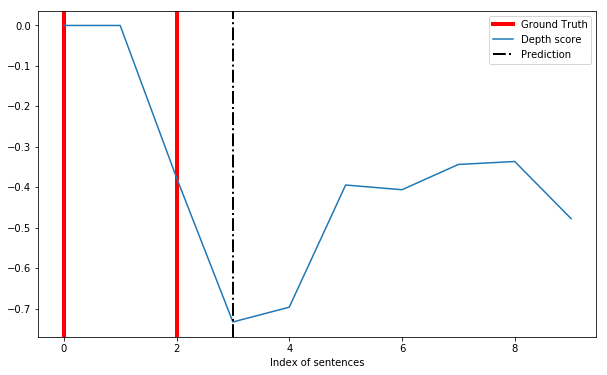

In [480]:
test_df = s_df7.reset_index().copy()
i = test_df.index[np.random.randint(10000)]
block_label = min(test_df['block label'].iloc[i][1:], key=lambda x:abs(x-test_df['pred'].iloc[i]))
depth_score = test_df['depth score'].iloc[i]
IDs = test_df['LineIDs'].iloc[i]
plt.figure(figsize=(10,6))
plt.axvline(0,alpha=1,lw=4,c='r')
plt.axvline(block_label,alpha=1,lw=4,c='r',label='Ground Truth')
    
    
smooth_score = np.round(smooth(depth_score,window_len=5),5)

# plt.axvline(np.random.randint(s_size),label='random pred')
# plt.axvline(s_df['pred1'].iloc[i],c='b',label='pred1',linestyle='-.',lw=3)
# plt.axvline(s_df['pred2'].iloc[i],c='g',label='pred2',linestyle='--')
plt.plot(np.arange(len(depth_score)),depth_score,label='Depth score')
# plt.plot(np.arange(len(depth_score)),smooth_score,label='Smooth score')
plt.axvline(test_df['pred'].iloc[i],c='k',label='Prediction',linestyle='-.',lw=2)
# plt.scatter(y=s,x=np.arange(len(depth_score)),label='smooth score')
plt.xlabel('Index of sentences')
plt.legend()

print(test_df['block label'].iloc[i][1:])

j = 0
for ids in IDs:
    print(j,ids,' '.join(movie_lines[ids]['Line']))
    j += 1

0 L46262 I mean , I 've got the whole package , right ? A great life , a beautiful wife , and a few kids .
1 L46263 A < u > few < /u > ?
2 L46420 Please , Sylvia ! It 's a quarter to nine !
3 L46421 First you ca n't wait to get me up here , and now -- rush , rush , rush ! Makes a person feel cheap .
4 L46422 Sylvia -- sweetie -- it 's not that -- but I promised the guy I 'd be out of here by eight o'clock , positively .
5 L46423 What guy ? Whose apartment is this , anyway ?
6 L46424 What 's the difference ? Some schnook that works in the office .
7 L46425 Good evening , Mr. Baxter .
8 L46426 Good evening , Mrs. Lieberman .
9 L46427 Some weather we 're having . Must be from all the meshugass at Cape Canaveral . You locked out of your apartment ?


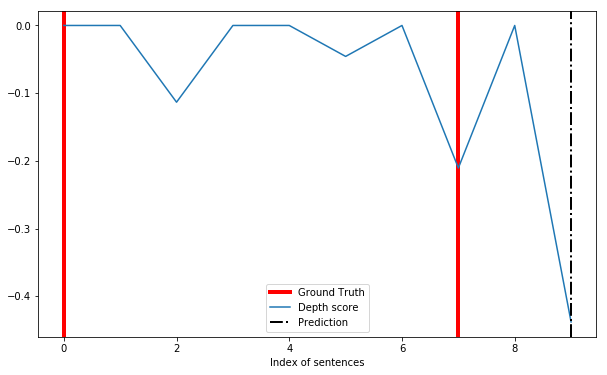

In [352]:
test_df = s_df2.reset_index().copy()
depth_score = test_df['depth score'].iloc[i]
IDs = test_df['LineIDs'].iloc[i]
plt.figure(figsize=(10,6))
plt.axvline(0,alpha=1,lw=4,c='r')
plt.axvline(block_label,alpha=1,lw=4,c='r',label='Ground Truth')
    
plt.plot(np.arange(len(depth_score)),depth_score,label='Depth score')
plt.axvline(test_df['pred'].iloc[i],c='k',label='Prediction',linestyle='-.',lw=2)
# plt.scatter(y=s,x=np.arange(len(depth_score)),label='smooth score')
plt.xlabel('Index of sentences')
plt.legend()

j = 0
for ids in IDs:
    print(j,ids,' '.join(movie_lines[ids]['Line']))
    j += 1

### Try on OpenSubtitle dataset

In [1]:
import re,gensim,os,chardet
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
tokenizer = RegexpTokenizer(r'\w+')

# ps.stem(x)

In [45]:
def sentence_extract(line):
    encode_type = chardet.detect(line)  
    try:
        line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
#         line = multiple_replace(dict_, line)
        line = line.replace('<GO>','').replace('<EOS>','')
        line = [line.split('|')[1]]
    except:
        line = []
    return line

In [46]:
from smart_open import smart_open
class MyCorpus(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname)[:500]: # take 500 files for test
            for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
                yield from sentence_extract(line)

In [47]:
def corpus_clean(s):
    s = s.replace('\'','')
    s = tokenizer.tokenize(s.lower())
#     s = ' '.join([ps.stem(x) for x in s])
    s = ' '.join(s)
    return s

In [48]:
file_dir = '/Users/yan/Documents/document/EPFL/MA2/semesterprj/code/processed_data/OpenSubtitle/'
sentences = MyCorpus(file_dir)
sentences = [x.lstrip().rstrip() for x in sentences]
sentences = list(filter(None,sentences))

In [50]:
len(sentences)

257863

In [8]:
sentences_stem = [corpus_clean(s) for s in sentences]

In [9]:
idx_question = [i for i,x in enumerate(sentences) if '?' in x] # return index where exits '?'
len(idx_question)

61261

In [10]:
diff_idx = np.array(idx_question[1:]) - np.array(idx_question[:-1])
diff_idx = np.append(diff_idx,[0])

In [11]:
len(diff_idx)

61261

In [12]:
idx_before = idx_question[0]
for i in idx_question:
    if (len(sentences[i]) > 20) | (len(sentences[i]) < 4):
        idx_question.remove(i)
    if i-idx_before==1:
        idx_question.remove(idx_before)
    idx_before = i

In [13]:
len(idx_question)

34925

In [14]:
s_size = 10
corpus = []
for i in idx_question:
    s_tmp = [tokenizer.tokenize(x) for x in sentences_stem[i:i+s_size]]
    word_cnt = sum([len(x) for x in s_tmp])/len(s_tmp)
    if (word_cnt > 4) & (word_cnt< 20): # the average words number should be between 7-15 words
        corpus.extend(s_tmp)

In [15]:
len(corpus)

323090

In [16]:
lines = []
for i in range(len(corpus)-1):
    lines.append(corpus[i]+corpus[i+1])

In [17]:
model_opst = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model_opst.build_vocab(lines)  # can be a non-repeatable, 1-pass generator

model_opst.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model_opst.train(lines,total_examples=model_opst.corpus_count,epochs=model_opst.epochs)

(3163755, 4546819)

In [18]:
def cos_sim(v1,v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

def heuristic_max(s1,s2,flag=False,model=model_opst.wv):
    if len(s1)*len(s2) == 0:
        return np.nan

    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        if s1[i] in model.vocab.keys():
            s1_vec = model[s1[i]]
        else:
            continue # if the source target word is not in vocabulary list then corresponding similiarity row = 0
        for j in range(len(s2)):            
            if s2[j] in model.vocab.keys():
                s2_vec = model[s2[j]]
                matrix[i][j] = cos_sim(s1_vec,s2_vec)
            else:
                continue # for not-found words the similarity is 0
    s1_sim =  np.sum(np.max(matrix,1))/len(s1)
    s2_sim = np.sum(np.max(matrix,0))/len(s2)
    return 1/2*(np.round(s1_sim,5)+np.round(s2_sim,5))

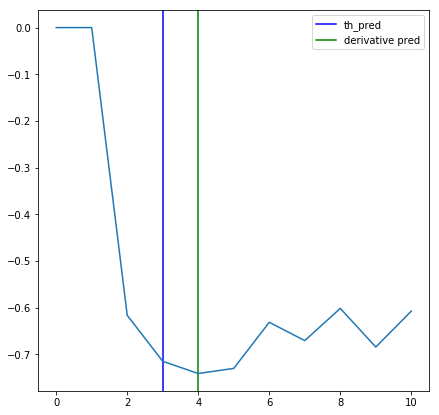

In [29]:
##### heuristic max using model 4 (upper case; puncuation)
idx = np.random.randint(100) * s_size

alpha = 0.5

sim = [heuristic_max(corpus[idx],corpus[idx+i],flag=True) for i in range(s_size)]
sim = [1] + sim
# smooth_score = smooth(np.array(sim))

s = np.array(sim)
depth_score = [0]
lpeak = s[0]
for k in range(1,len(s)):
    lpeak = max(s[0:k+1])
    depth_score.append(s[k]-lpeak)


pred = th_pred(np.array(depth_score),alpha)
delta = np.array(depth_score[1:]) - np.array(depth_score[:-1])
delta = np.where(delta>0)[0]
delta = delta[0] if len(delta>0) else s_size-1

plt.figure(figsize=(7,7))
plt.axvline(pred,c='b',label='th_pred')
plt.axvline(pred1,c='g',label='derivative pred')
plt.legend()
plt.plot(depth_score)

In [236]:
org_stem = sentences_stem[idx_question[idx]:idx_question[idx]+s_size]

In [31]:
wordcnt_ = []
len_ = []
i = 0
while(i<500):
    print(i)
    idx = np.random.randint(5000)
    org = sentences[idx_question[idx]:idx_question[idx]+s_size]
    org_stem = sentences_stem[idx_question[idx]:idx_question[idx]+s_size]

    alpha = 0.5
    s_size = 10

    sim = [heuristic_max(org_stem[i],org_stem[i+1]) for i in range(s_size-1)]
    sim = [1] + sim
#     smooth_score = smooth(np.array(sim))

    s = np.array(sim)
    depth_score = [0]
    lpeak = s[0]
    for k in range(1,len(s)):
        lpeak = max(s[0:k+1])
        depth_score.append(s[k]-lpeak)

    pred = th_pred(np.array(depth_score),alpha)
    delta = np.array(depth_score[1:]) - np.array(depth_score[:-1])
    delta = np.where(delta>0)[0]
    delta = delta[0] if len(delta>0) else s_size-1
    
    pred = max(pred,delta)

    pred_text = org[:pred]
    if '?' in pred_text[-1]:
        continue
    len_.append(pred)
    wordcnt_.append(np.mean([len(tokenizer.tokenize(x)) for x in pred_text]))
    
    with open('session_segmentation.txt', 'a') as f:
        
        f.write("==========Starting of Session %s.==========\n" % str(i))
        f.write("==========Starting of Dialogue %s.==========\n" % str(i))
        for j in range(len(org)):
            if j<pred:
                f.write('Turn %s: '% str(j+1))
            f.write("%s\n" % org[j])
            if j == pred-1:
                f.write("==========Predicted ending of Dialogue %s.==========\n" % str(i))
        f.write("==========End of this session==========\n\n\n")
    i += 1

0
1
2
2
2
3
4
5
6
7
8
8
8
9
10
11
11
12
13
14
15
15
16
16
16
17
18
18
18
18
19
19
19
20
21
22
23
23
24
24
25
26
27
28
29
30
30
31
31
31
32
32
33
33
33
34
35
35
36
36
37
37
38
38
39
40
41
42
43
43
44
45
46
47
48
48
48
48
49
50
51
52
53
53
53
54
55
56
56
57
57
57
57
58
59
60
61
62
63
64
65
66
67
68
69
70
70
71
72
72
72
72
72
73
74
74
74
74
75
75
76
77
77
78
79
79
80
81
82
82
82
82
82
83
83
83
84
85
86
86
87
87
87
88
88
88
89
89
90
91
92
93
94
95
96
97
98
99
99
100
101
101
101
102
103
103
104
104
105
105
106
107
108
108
108
109
109
109
109
110
110
111
112
112
113
113
114
114
114
114
114
115
116
116
117
118
119
119
119
120
121
122
122
123
124
125
126
126
127
128
129
130
131
131
132
132
132
132
133
133
133
134
134
135
136
136
136
136
137
137
138
139
140
141
142
143
144
145
145
146
147
148
149
150
150
151
151
151
152
152
152
153
153
153
154
155
156
156
157
157
158
158
159
159
160
160
161
162
162
163
163
164
165
166
167
168
168
169
170
171
172
173
173
173
174
174
174
174
175
175
175
176
176
1

/anaconda3/envs/semester/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  
/anaconda3/envs/semester/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in greater


362
362
363
364
364
365
366
367
368
369
370
371
372
373
373
374
375
375
376
377
377
377
377
378
379
380
381
382
382
383
383
383
384
385
386
386
387
388
388
389
390
390
391
391
391
392
392
392
393
394
394
395
395
396
396
396
396
396
397
397
398
399
399
399
400
401
401
402
403
404
405
405
405
405
405
405
406
406
407
408
408
408
409
409
410
411
412
413
414
415
416
417
418
419
419
419
419
419
420
420
421
422
422
422
422
423
424
425
426
427
428
429
430
430
430
431
432
432
433
433
433
434
434
435
436
436
437
438
438
439
440
441
442
442
443
444
445
446
446
447
447
447
447
448
449
449
450
451
452
453
454
454
454
454
455
455
456
456
457
457
458
459
459
459
459
460
461
461
462
462
462
463
464
465
465
466
467
468
469
469
470
470
470
471
472
473
474
474
474
475
476
477
478
479
479
479
479
479
479
479
480
480
480
481
482
483
484
484
484
485
485
485
486
487
487
487
487
487
488
489
489
489
489
490
491
492
493
494
495
495
496
496
497
497
498
499
